# SPECFEM Users Workshop -- Day 2 (Oct. 6, 2022)

## Day 2C: Sensitivity Kernels (Liu & Tromp 2006)

- This notebook gives a tour of the example in the SPECFEM3D_Cartesian package, on how to regenerate the sensitivity kernels in [Liu&Tromp 2006](https://pubs.geoscienceworld.org/ssa/bssa/article/96/6/2383/146674/Finite-Frequency-Kernels-Based-on-Adjoint-Methods)       
- These instructions should be run from inside the Docker container, using Jupyter Lab (see instructions [here](https://github.com/adjtomo/adjdocs/blob/main/readmes/docker_image_install.md)).

-----------

**Relevant Links:** 
- Today's Notebook: https://github.com/adjtomo/adjdocs/blob/main/workshops/2022-10-05_specfem_users/day_2c_kernels_liutromp2006.ipynb  
- Completed Notebook: https://github.com/adjtomo/adjdocs/blob/main/workshops/2022-10-05_specfem_users/completed_notebooks/day_2c_kernels_liutromp2006.ipynb  
- Day 0 Notebook (Container Testing): https://github.com/adjtomo/adjdocs/blob/main/workshops/2022-10-05_specfem_users/day_0_container_testing.ipynb  
- SPECFEM3D_Cartesian User Manual: https://github.com/geodynamics/specfem3d/blob/devel/doc/USER_MANUAL/manual_SPECFEM3D_Cartesian.pdf
- SPECFEM3D_Cartesian GitHub Repository: https://github.com/geodynamics/specfem3d/tree/devel
- SPECFEM3D_Cartesian Liu&Tromp 2006 Sensitivity Kernel Example - https://github.com/geodynamics/specfem3d/tree/devel/EXAMPLES/sensitivity_kernels_liutromp2006
- Liu & Tromp 2006 paper - https://pubs.geoscienceworld.org/ssa/bssa/article/96/6/2383/146674/Finite-Frequency-Kernels-Based-on-Adjoint-Methods

**Jupyter Quick Tips:**

- **Run cells** one-by-one by hitting the $\blacktriangleright$ button at the top, or by hitting `Shift + Enter`
- **Run all cells** by hitting the $\blacktriangleright\blacktriangleright$ button at the top, or by running `Run -> Run All Cells`
- **Currently running cells** that are still processing will have a `[*]` symbol next to them
- **Finished cells** will have a `[1]` symbol next to them. The number inside the brackets represents what order this cell has been run in.
- Commands that start with `!` are Bash commands (i.e., commands you would run from the terminal)
- Commands that start with `%` are Jupyter Magic commands.
- To time a task, put a `%time` before the command (e.g., `%time ! ls`)

>__NOTE:__
- In this notebook, we will not be running any simulations. It's just a presentation of some of the steps needed to regenerate some of the kernels in [Liu&Tromp 2006](https://pubs.geoscienceworld.org/ssa/bssa/article/96/6/2383/146674/Finite-Frequency-Kernels-Based-on-Adjoint-Methods), and how the pre-saved regenerated kernels look like.
- All instructions provided in this notebook as [README](https://github.com/geodynamics/specfem3d/blob/devel/EXAMPLES/sensitivity_kernels_liutromp2006/README) file excerpts, are **not** for running the example within this container setup, but in a separate SPECFEM3D_cartesian set up based on the instructions given in the README file itself.

------------

In [ ]:
# Python packages we will need for this notebook
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

In [ ]:
# Where to find the example's instructions
%cd /home/scoped/specfem3d/EXAMPLES/sensitivity_kernels_liutromp2006/

In [ ]:
# Look at the files and folders
! ls *

## 1) Setup

>__Note:__ All instructions provided in this notebook as [README](https://github.com/geodynamics/specfem3d/blob/devel/EXAMPLES/sensitivity_kernels_liutromp2006/README) file excerpts, are **not** for running the example within this container setup, but in a separate SPECFEM3D_cartesian set up based on the instructions given in the README file itself.

In [ ]:
# Setup instructions (NOT for setting the example for running within this container)
! head -33 README | tail -n 23

-----------

## 2) Forward Simulation

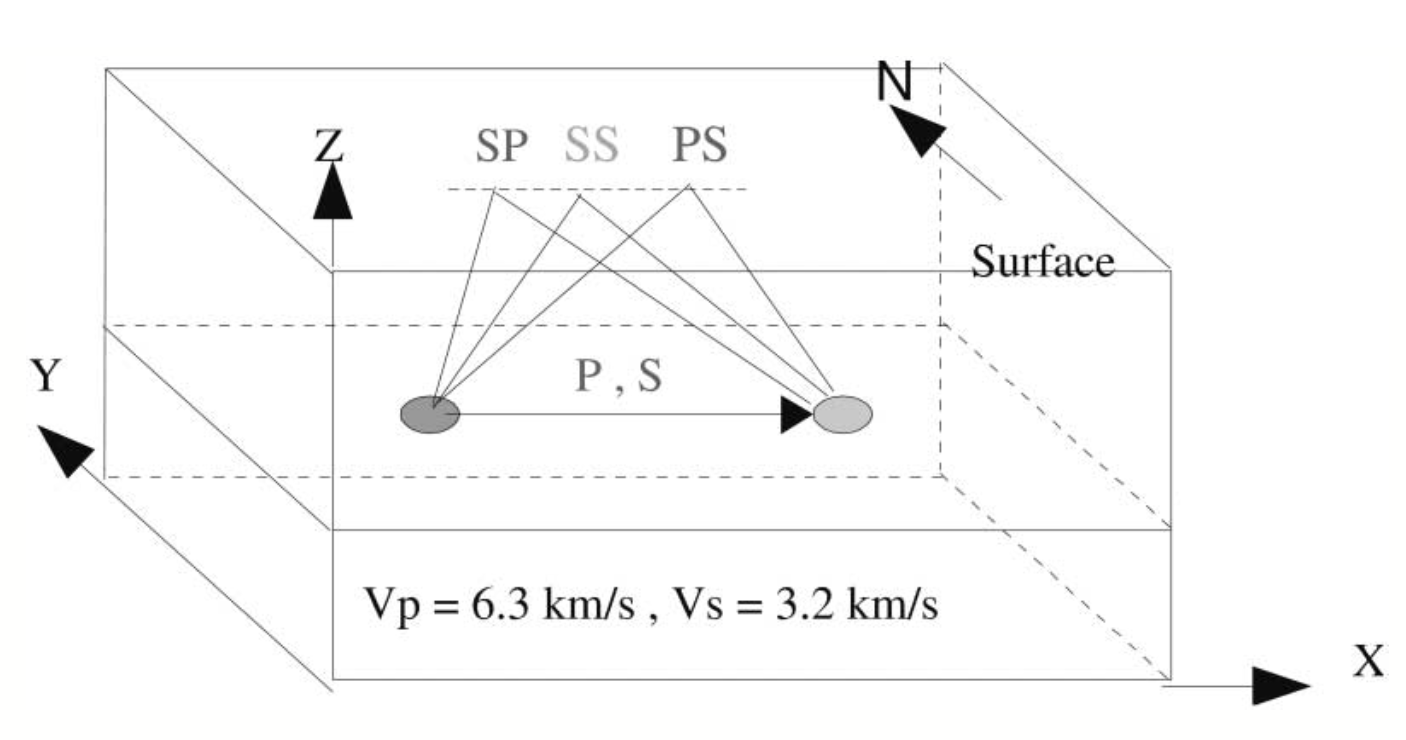

**Fig.** The homogeneous halfspace model, with the source station geometry, and the ray paths, modified from [Liu & Tromp 2006](https://pubs.geoscienceworld.org/ssa/bssa/article/96/6/2383/146674/Finite-Frequency-Kernels-Based-on-Adjoint-Methods). The source and the station are 100 km apart, at a depth of 40 km from the surface.

In [ ]:
# Forward simulation instructions (NOT for running simulations within this container)
! head -55 README | tail -n 18

In [ ]:
# Check the source file for the P_SV simulation
! cat DATA/FORCESOLUTION_P_SV

In [ ]:
# Check the source file for the SH simulation
! cat DATA/FORCESOLUTION_SH

In [ ]:
# Source Time Function

STF = np.genfromtxt("source_time_function.txt", dtype=None)
t = STF[0]*np.arange(len(STF)-1) - 10

plt.title("source time function")
plt.xlabel("---- time -->")

plt.plot(t,STF[1:])
plt.show()

>__NOTE:__ The external source time function, as required by SPECFEM3D_Cartesian, is the cumulative moment/force vs. time function, and **not** the moment/force rate vs. time function

In [ ]:
# Seismograms for P_SV_simulation

R01_X = np.genfromtxt("REF_SEIS/P_SV_simulation/XX.R00-01.HXX.semd", dtype=None, names=("time","HXX"))
R01_Y = np.genfromtxt("REF_SEIS/P_SV_simulation/XX.R00-01.HXY.semd", dtype=None, names=("time","HXY"))
R01_Z = np.genfromtxt("REF_SEIS/P_SV_simulation/XX.R00-01.HXZ.semd", dtype=None, names=("time","HXZ"))

t = R01_X["time"]

plt.title("Seismograms (P_SV_simulation)")
plt.xlabel("---- time -->")
plt.ylabel("---- displacement -->")

plt.plot(t,R01_X["HXX"],label="X")
plt.plot(t,R01_Y["HXY"],label="Y")
plt.plot(t,R01_Z["HXZ"],label="Z")

plt.text(12.5,.50,r'$P$',fontsize=10)
plt.text(26.5,.68,r'$PS+SP$',fontsize=10)

plt.legend(title="Component")
plt.show()

-----------

In [ ]:
# Seismograms for SH_simulation

R01_X = np.genfromtxt("REF_SEIS/SH_simulation/XX.R00-01.HXX.semd", dtype=None, names=("time","HXX"))
R01_Y = np.genfromtxt("REF_SEIS/SH_simulation/XX.R00-01.HXY.semd", dtype=None, names=("time","HXY"))
R01_Z = np.genfromtxt("REF_SEIS/SH_simulation/XX.R00-01.HXZ.semd", dtype=None, names=("time","HXZ"))

t = R01_X["time"]

plt.title("Seismograms (SH_simulation)")
plt.xlabel("---- time -->")
plt.ylabel("---- displacement -->")

plt.plot(t,R01_X["HXX"],label="X")
plt.plot(t,R01_Y["HXY"],label="Y")
plt.plot(t,R01_Z["HXZ"],label="Z")

plt.text(26,.55,r'$S$',fontsize=10)
plt.text(35,.51,r'$SS$',fontsize=10)

plt.legend(title="Component")
plt.show()

## 3) Adjoint Simulation

In [ ]:
# Adjoint simulation instructions (NOT for running simulations within this container)
! head -86 README | tail -n 28

In [ ]:
# Adjoint sources for P kernels

R01_X = np.genfromtxt("REF_ADJ_SRC/P/XX.R00-01.HXX.adj", dtype=None, names=("time","HXX"))
R01_Y = np.genfromtxt("REF_ADJ_SRC/P/XX.R00-01.HXY.adj", dtype=None, names=("time","HXY"))
R01_Z = np.genfromtxt("REF_ADJ_SRC/P/XX.R00-01.HXZ.adj", dtype=None, names=("time","HXZ"))

t = R01_X["time"]

plt.title("Adjoint sources (P kernel)")
plt.xlabel("---- time -->")

plt.plot(t,R01_X["HXX"],label="X")
plt.plot(t,R01_Y["HXY"],label="Y")
plt.plot(t,R01_Z["HXZ"],label="Z")

plt.legend(title="Component")
plt.show()

In [ ]:
# Adjoint sources for PS+SP kernels

R01_X = np.genfromtxt("REF_ADJ_SRC/PSSP/XX.R00-01.HXX.adj", dtype=None, names=("time","HXX"))
R01_Y = np.genfromtxt("REF_ADJ_SRC/PSSP/XX.R00-01.HXY.adj", dtype=None, names=("time","HXY"))
R01_Z = np.genfromtxt("REF_ADJ_SRC/PSSP/XX.R00-01.HXZ.adj", dtype=None, names=("time","HXZ"))

t = R01_X["time"]

plt.title("Adjoint sources (PS+SP kernel)")
plt.xlabel("---- time -->")

plt.plot(t,R01_X["HXX"],label="X")
plt.plot(t,R01_Y["HXY"],label="Y")
plt.plot(t,R01_Z["HXZ"],label="Z")

plt.legend(title="Component")
plt.show()

In [ ]:
# Adjoint sources for S kernels

R01_X = np.genfromtxt("REF_ADJ_SRC/S/XX.R00-01.HXX.adj", dtype=None, names=("time","HXX"))
R01_Y = np.genfromtxt("REF_ADJ_SRC/S/XX.R00-01.HXY.adj", dtype=None, names=("time","HXY"))
R01_Z = np.genfromtxt("REF_ADJ_SRC/S/XX.R00-01.HXZ.adj", dtype=None, names=("time","HXZ"))

t = R01_X["time"]

plt.title("Adjoint sources (S kernel)")
plt.xlabel("---- time -->")

plt.plot(t,R01_X["HXX"],label="X")
plt.plot(t,R01_Y["HXY"],label="Y")
plt.plot(t,R01_Z["HXZ"],label="Z")

plt.legend(title="Component")
plt.show()

In [ ]:
# Adjoint sources for SS kernels

R01_X = np.genfromtxt("REF_ADJ_SRC/SS/XX.R00-01.HXX.adj", dtype=None, names=("time","HXX"))
R01_Y = np.genfromtxt("REF_ADJ_SRC/SS/XX.R00-01.HXY.adj", dtype=None, names=("time","HXY"))
R01_Z = np.genfromtxt("REF_ADJ_SRC/SS/XX.R00-01.HXZ.adj", dtype=None, names=("time","HXZ"))

t = R01_X["time"]

plt.title("Adjoint sources (SS kernel)")
plt.xlabel("---- time -->")

plt.plot(t,R01_X["HXX"],label="X")
plt.plot(t,R01_Y["HXY"],label="Y")
plt.plot(t,R01_Z["HXZ"],label="Z")

plt.legend(title="Component")
plt.show()

-----------

## 4) Kernel Visualization

In [ ]:
# Visualization instructions (NOT for running within this container)
! tail -n 39 README

>__NOTE:__ For detailed instructions on how to use paraview for kernel visualization, read the final section of this [file](https://github.com/geodynamics/specfem3d/blob/devel/EXAMPLES/homogeneous_halfspace_HEX8_elastic_absorbing_Stacey_5sides/README_kernel)

In [ ]:
# Pre-saved reference kernel figures
%cd /home/scoped/specfem3d/EXAMPLES/sensitivity_kernels_liutromp2006/REF_KERNELS/

In [ ]:
Image("P_alpha_kernel_3D.png")

In [ ]:
Image("P_beta_kernel_3D.png")

In [ ]:
Image("S_alpha_kernel_3D.png")

In [ ]:
Image("S_beta_kernel_3D.png")

In [ ]:
Image("SS_alpha_kernel_3D.png")

In [ ]:
Image("SS_beta_kernel_3D.png")

In [ ]:
Image("PSSP_alpha_kernel_3D.png")

In [ ]:
Image("PSSP_beta_kernel_3D.png")

In [ ]:
Image("PSSP_kappa_kernel_3D.png")

In [ ]:
Image("PSSP_mu_kernel_3D.png")

In [ ]:
Image("PSSP_rho_kernel_3D.png")

In [ ]:
Image("PSSP_rhop_kernel_3D.png")

-----------

**Congratulations! You have reached your destination.**